<a href="https://colab.research.google.com/github/SamridhiAhuja2075/CBSC/blob/main/PCOS%20Detection%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Uploading The Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PythonML/PCOS_data.csv')

### Analysing The Data & Preprocessing

In [ ]:
df.head()

,0,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1,1,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,0,0,120,80,3,4,16.0,14.0,7.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   0                       541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   541 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [ ]:
df.describe()

,0,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,19.243993,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,1.688629,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Column: {column}")
        print(df[column].unique())
# Convert to numeric, forcing errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')
# Drop columns with NaN values (optional)
df = df.dropna(axis=1, how='any')

Column: II    beta-HCG(mIU/mL)
['1.99' '494.08' '801.45' '100.51' '158.51' '1214.23' '91.55' '749.98'
 '218.65' '13' '610.63' '4490.18' '11.24' '15' '768.03' '12' '10' '20'
 '30.66' '1455' '497.41' '167' '9.83' '141.06' '528.5' '177.57' '65.03'
 '173.66' '161.49' '3.98' '756.61' '255.02' '273.7' '14.46' '145.89'
 '100.09' '110.17' '174.37' '75.51' '3893.06' '600.23' '3350.19' '97.63'
 '14.4' '2' '177.58' '12.17' '25.3' '100.2' '479.66' '1.9' '586.06'
 '1.99.' '2.8' '15.36' '54.08' '152.13' '3.05' '201.36' '16069.69' '57.08'
 '232.71' '23.5' '180.3' '102.3' '481.3' '563.8' '4.32' '230.5' '155.3'
 '3.888' '523.6' '1.65' '3.83' '569.1' '236.5' '896.6' '2.58' '569.3'
 '108.66' '3.99' '121.8' '122.58' '355.28' '122.3' '596.2' '588.7' '147.6'
 '12.37' '144.63' '475.04' '515.53' '99.69' '70.42' '342.91' '148.52'
 '272.78' '355.51' '150.91' '391.46' '464.12' '41.77' '1390.58' '213.83'
 '45.9' '18.36' '154.48' '25000' '638.52' '4.76' '18.13' '89.34' '366.04'
 '14.34' '75.62' '4.96' '1134.4' '78

In [ ]:
df.isnull().sum()

,0
0,0
Patient File No.,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0


### Exploratory Analysis

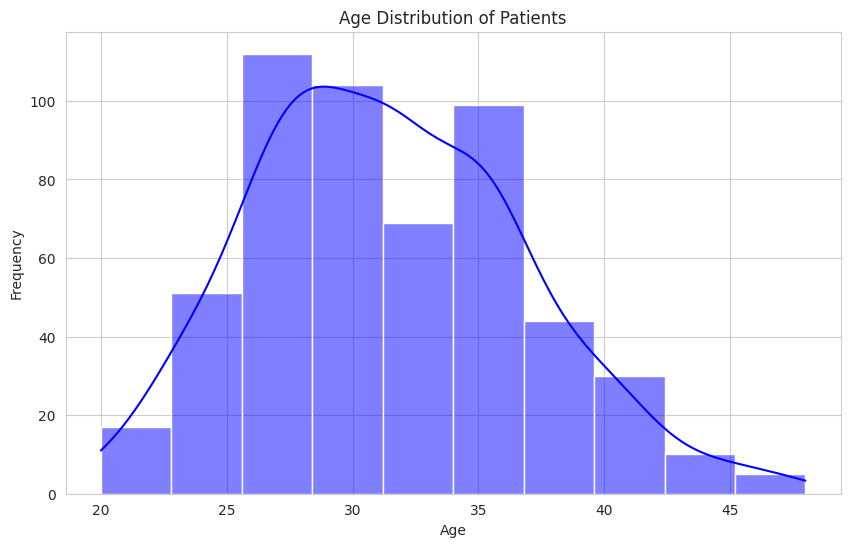

In [ ]:
sns.set_style('whitegrid')
#Plotting histogram for age
plt.figure(figsize=(10, 6))
sns.histplot(df[' Age (yrs)'], kde=True, color = 'blue', bins = 10)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

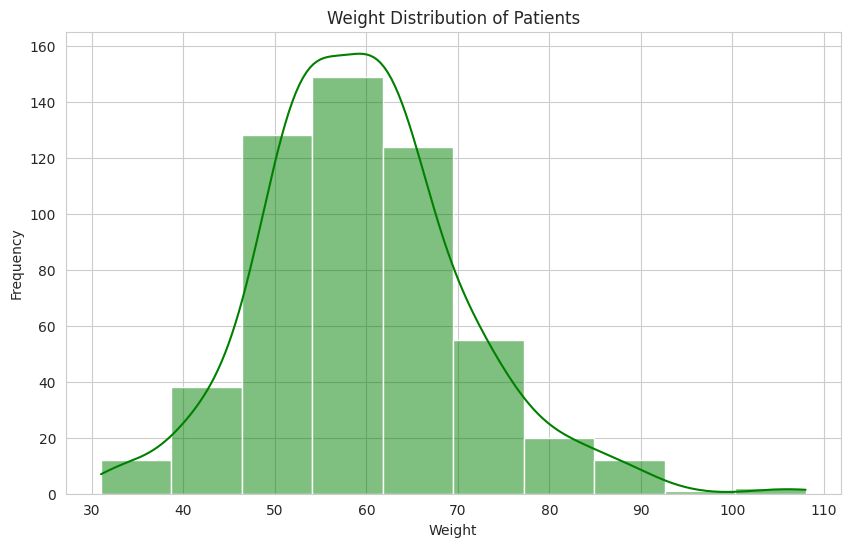

In [ ]:
#Plotting histogram for age
plt.figure(figsize=(10, 6))
sns.histplot(df['Weight (Kg)'], kde=True, color = 'green', bins = 10)
plt.title('Weight Distribution of Patients')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

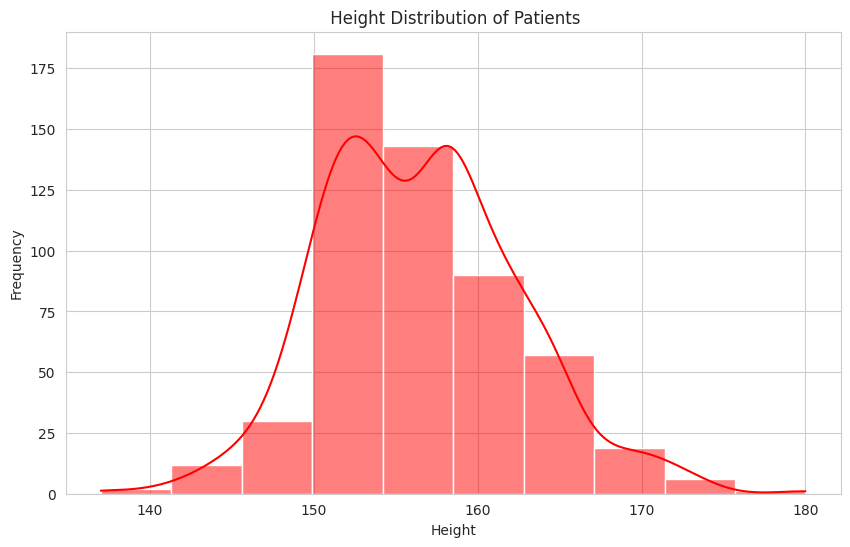

In [ ]:
#Plotting histogram for age
plt.figure(figsize=(10, 6))
sns.histplot(df['Height(Cm) '], kde=True, color = 'red', bins = 10)
plt.title(' Height Distribution of Patients')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

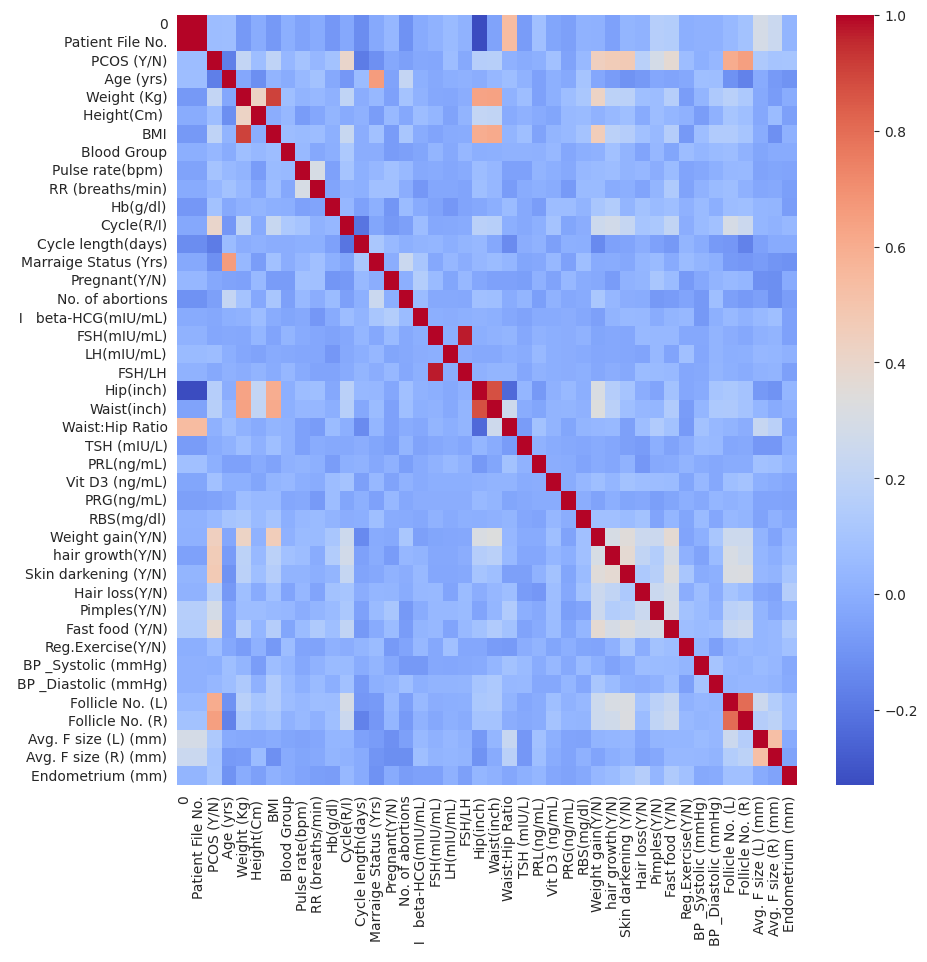

In [ ]:
fig = plt.figure(figsize=(10,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [ ]:
correlation_with_target = correlation_matrix['PCOS (Y/N)'].sort_values(ascending=False)
print(correlation_with_target)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.648327
Follicle No. (L)          0.603346
Skin darkening (Y/N)      0.475733
hair growth(Y/N)          0.464667
Weight gain(Y/N)          0.441047
Cycle(R/I)                0.401644
Fast food (Y/N)           0.376183
Pimples(Y/N)              0.286077
Weight (Kg)               0.211938
BMI                       0.199697
Hair loss(Y/N)            0.172879
Waist(inch)               0.164598
Hip(inch)                 0.162297
Avg. F size (L) (mm)      0.132992
Endometrium (mm)          0.106648
Avg. F size (R) (mm)      0.097690
Pulse rate(bpm)           0.091821
Hb(g/dl)                  0.087170
Vit D3 (ng/mL)            0.085494
Height(Cm)                0.068254
Reg.Exercise(Y/N)         0.065337
LH(mIU/mL)                0.063879
Patient File No.          0.060998
0                         0.060998
RBS(mg/dl)                0.048922
BP _Diastolic (mmHg)      0.038032
RR (breaths/min)          0.036928
Blood Group         

### Selecting Target Varible and Feature Selection using SelectKBest

In [ ]:
columns_to_include = [i for i in range(df.shape[1]) if i != 2]
x = df.iloc[:, columns_to_include].values
y=df.iloc[:,2].values

In [ ]:
from sklearn.feature_selection import SelectKBest , chi2 , mutual_info_classif , f_classif
#here we changed the value of k and parameter to record our values
selector = SelectKBest(chi2, k=25)
X_new =selector.fit_transform(x,y)
print(X_new)

[[  1.   1.  28. ...   3.   3.  18.]
 [  2.   2.  36. ...   3.   5.  15.]
 [  3.   3.  33. ...  13.  15.  18.]
 ...
 [539. 539.  36. ...   1.   0.  18.]
 [540. 540.  27. ...   7.   6.  18.]
 [541. 541.  23. ...   9.  10.  19.]]


### Training & Testing The Data

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Experiment 1

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
classifiers={
'Logistic Regression' : LogisticRegression(max_iter=500,solver='newton-cg'),
'Decision Tree' : DecisionTreeClassifier(),
'Random Forest' : RandomForestClassifier(),
'Support Vector Machine' : SVC(),
}
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n", cm)
    accuracy = accuracy_score(y_test, y_pred)
    result[name] = accuracy
    print(f'{name} Accuracy : {accuracy * 100:.2f}%')
    print(classification_report(y_test, y_pred,zero_division=0))
for i in result:
  print(i,result[i]*100)

Confusion Matrix for Logistic Regression:
 [[106   4]
 [ 13  40]]
Logistic Regression Accuracy : 89.57%
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       110
           1       0.91      0.75      0.82        53

    accuracy                           0.90       163
   macro avg       0.90      0.86      0.88       163
weighted avg       0.90      0.90      0.89       163

Confusion Matrix for Decision Tree:
 [[97 13]
 [15 38]]
Decision Tree Accuracy : 82.82%
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       110
           1       0.75      0.72      0.73        53

    accuracy                           0.83       163
   macro avg       0.81      0.80      0.80       163
weighted avg       0.83      0.83      0.83       163

Confusion Matrix for Random Forest:
 [[108   2]
 [ 13  40]]
Random Forest Accuracy : 90.80%
              precision    recall  f1-score   support

       

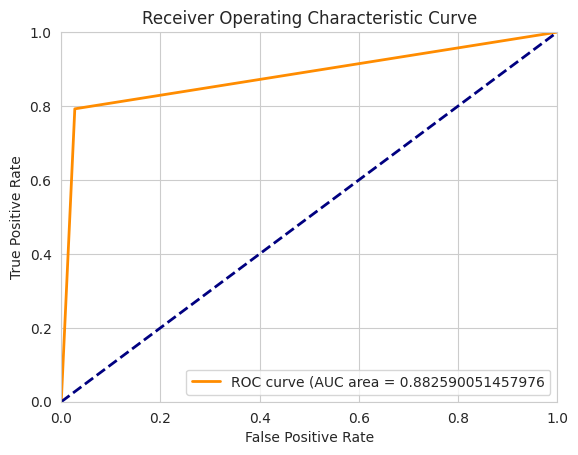

In [ ]:
from sklearn.metrics import roc_curve, auc
# Actual outcomes and predicted probabilities # Calculate ROC curve
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
# Calculate AUC
roc_auc=auc (fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color= 'darkorange', lw=2, label=f'ROC curve (AUC area = {roc_auc}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend (loc= "lower right")

### Experiment 2

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)
classifiers={
'Logistic Regression' : LogisticRegression(max_iter=500,solver='newton-cg',random_state=42),
'Decision Tree' : DecisionTreeClassifier(),
'Random Forest' : RandomForestClassifier(),
'Support Vector Machine' : SVC(kernel='linear',),
}
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = {}
for name, clf in classifiers.items():
  rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='accuracy')
  rfecv.fit(X_train_resampled, y_train_resampled)
  X_train_rfecv = rfecv.transform(X_train_resampled)
  X_test_rfecv = rfecv.transform(X_test)
  clf.fit(X_train_rfecv, y_train_resampled)
  y_pred = clf.predict(X_test_rfecv)
  cm = confusion_matrix(y_test, y_pred)
  print(f"Confusion Matrix for {name}:\n", cm)
  accuracy = accuracy_score(y_test, y_pred)
  result[name] = accuracy
  print(f'{name} Accuracy: {accuracy * 100:.2f}%')
  print(classification_report(y_test, y_pred, zero_division=0))
for i in result:
  print(i,result[i]*100)

Confusion Matrix for Logistic Regression:
 [[101   9]
 [  9  44]]
Logistic Regression Accuracy: 88.96%
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       110
           1       0.83      0.83      0.83        53

    accuracy                           0.89       163
   macro avg       0.87      0.87      0.87       163
weighted avg       0.89      0.89      0.89       163

Confusion Matrix for Decision Tree:
 [[102   8]
 [ 14  39]]
Decision Tree Accuracy: 86.50%
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       110
           1       0.83      0.74      0.78        53

    accuracy                           0.87       163
   macro avg       0.85      0.83      0.84       163
weighted avg       0.86      0.87      0.86       163

Confusion Matrix for Random Forest:
 [[106   4]
 [ 10  43]]
Random Forest Accuracy: 91.41%
              precision    recall  f1-score   support

      

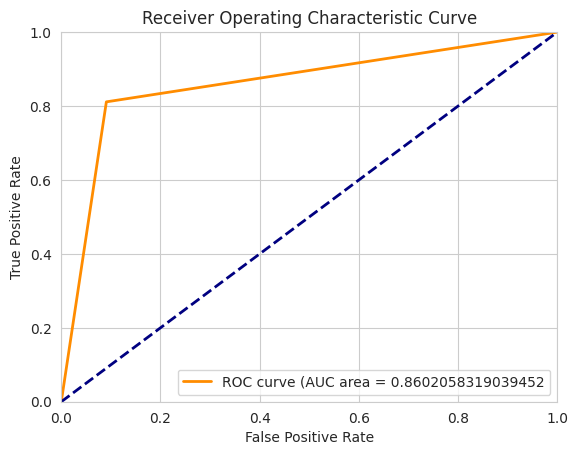

In [ ]:
from sklearn.metrics import roc_curve, auc
# Actual outcomes and predicted probabilities # Calculate ROC curve
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
# Calculate AUC
roc_auc=auc (fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color= 'darkorange', lw=2, label=f'ROC curve (AUC area = {roc_auc}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend (loc= "lower right")

### Experiment 3

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Standardize features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)
classifiers = {
    'Logistic Regression': (LogisticRegression(max_iter=500, solver='newton-cg', random_state=42), {
        'C': [0.01, 0.1, 1, 10, 100]
    }),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }),
    'Support Vector Machine': (SVC(kernel='linear', random_state=42), {
        'C': [0.01, 0.1, 1, 10, 100]
    }),
}
for name, (clf, param_grid) in classifiers.items():
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)

    print(f"Best parameters for {name}: {grid_search.best_params_}")

    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:\n", cm)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')
    print(classification_report(y_test, y_pred, zero_division=0))
for i in result:
  print(i,result[i]*100)


Best parameters for Logistic Regression: {'C': 0.1}
Confusion Matrix for Logistic Regression:
 [[109   1]
 [ 18  35]]
Logistic Regression Accuracy: 88.34%
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       110
           1       0.97      0.66      0.79        53

    accuracy                           0.88       163
   macro avg       0.92      0.83      0.85       163
weighted avg       0.90      0.88      0.88       163

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 10}
Confusion Matrix for Decision Tree:
 [[103   7]
 [ 15  38]]
Decision Tree Accuracy: 86.50%
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       110
           1       0.84      0.72      0.78        53

    accuracy                           0.87       163
   macro avg       0.86      0.83      0.84       163
weighted avg       0.86      0.87      0.86       163

Best parameters for 

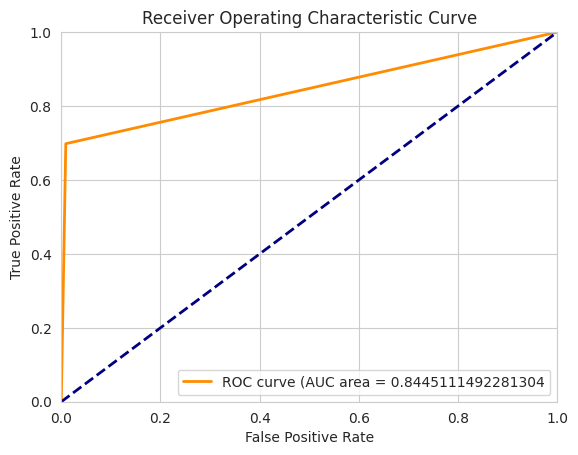

In [ ]:
from sklearn.metrics import roc_curve, auc
# Actual outcomes and predicted probabilities # Calculate ROC curve
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
# Calculate AUC
roc_auc=auc (fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color= 'darkorange', lw=2, label=f'ROC curve (AUC area = {roc_auc}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend (loc= "lower right")